In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

# **Request-Oriented Sampling Method for DoW Attack Detection**
The Request-Oriented Sampling Method represents a tailored approach to data collection aimed at accurately capturing runtime characteristics within a system. Unlike traditional sampling methods, which may employ fixed intervals or random sampling techniques, this method dynamically adjusts the sampling strategy based on the requests or function calls made to the system.

**Key Aspects of the Request-Oriented Sampling Method**

1. Dynamic Sampling Strategy: The sampling strategy is dynamically adjusted based on the requests or function calls received by the system. By prioritizing samples aligned with the operational workload, this method ensures that the collected data accurately represent the real-time behavior of the system.

2. Alignment with Operational Context: The sampling strategy is tailored to the specific operational context of the application or system under analysis. This alignment ensures that the collected data reflect the actual workload patterns and system dynamics, enhancing the effectiveness of anomaly detection efforts.

3. Customized Approach: Unlike pre-defined outlier detection models, the Request-Oriented Sampling Method emphasizes a customized approach to data collection. By focusing on sampling techniques aligned with the functional behavior of the system, this method enhances the accuracy of anomaly detection and improves overall system security.

4. Real-Time Detection: By capturing runtime characteristics through dynamic sampling, the Request-Oriented Sampling Method enables real-time detection of anomalies indicative of Denial of Wallet (DoW) attacks. This proactive approach allows for timely response and mitigation of potential threats, minimizing the impact on system performance and security.

In summary, the Request-Oriented Sampling Method represents a tailored approach to data collection that prioritizes samples based on the requests or function calls made to the system. By aligning the sampling strategy with the operational workload and system behavior, this method enhances the accuracy and effectiveness of anomaly detection efforts, thereby improving overall system security and resilience against DoW attacks.

In [5]:
# Load the dataset
data = pd.read_csv('dataset.csv')

In [6]:
# Perform one-hot encoding for the 'vmcategory' column
encoded_data = pd.get_dummies(data, columns=['vmcategory'], drop_first=True)

# Display the first few rows of the encoded dataset
print("Encoded Dataset:\n", encoded_data.head())

Encoded Dataset:
    Id              IP   bot  FunctionId functionTrigger  \
0   0   38.57.146.249  True        12.0    notification   
1   1  55.220.132.116  True        12.0    notification   
2   2   141.232.38.48  True        12.0    notification   
3   3  228.143.56.163  True        12.0    notification   
4   4  223.113.21.186  True        12.0    notification   

                  timestamp  SubmitTime     RTT  InvocationDelay  \
0  2022-01-02T03:31:34.498Z        73.0  2616.0      1416.003662   
1  2022-01-02T03:54:53.136Z        73.0  2616.0      1416.003662   
2  2022-01-02T03:38:31.950Z        73.0  2616.0      1416.003662   
3  2022-01-02T03:44:36.548Z        73.0  2616.0      1416.003662   
4  2022-01-02T03:52:54.326Z        73.0  2616.0      1416.003662   

   ResponseDelay  FunctionDuration  ActiveFunctionsAtRequest  \
0     154.615479       1045.380831                      12.0   
1     154.615479       1045.380831                      12.0   
2     154.615479       104

# **Selection of Relevant Features**
The selection of relevant features in machine learning plays a crucial role in building accurate and efficient models. In the context of our analysis on DoW attack detection using the Request-Oriented Sampling Method, the features selected are critical for capturing the underlying patterns and characteristics of function workloads that may indicate anomalies. Here's why these features were chosen:

1. RTT (Round-Trip Time): RTT measures the time taken for a request to travel from the client to the server and back. Anomalies in RTT can indicate delays or disruptions in communication, which may be indicative of DoW attacks.

2. Invocation Delay: This feature represents the delay between the invocation of a function and the initiation of its execution. Sudden spikes or unusual patterns in invocation delay may signal abnormal behavior in function execution, potentially indicating DoW attacks.

3. Response Delay: Response delay measures the time taken by the server to respond to a client request. Unusual delays in response times may suggest congestion, overload, or malicious interference, which are typical characteristics of DoW attacks.

4. Function Duration: Function duration denotes the time taken to execute a specific function. Variations in function duration beyond expected thresholds may indicate abnormal workload patterns, which could be attributed to DoW attacks.

5. Active Functions at Request: This feature captures the number of active functions at the time of the request. An increase in the number of active functions may lead to resource contention and performance degradation, which are potential indicators of DoW attacks.

In [7]:
relevant_features = [
    'RTT',
    'InvocationDelay',
    'ResponseDelay',
    'FunctionDuration',
    'ActiveFunctionsAtRequest',
    'maxcpu',
    'avgcpu',
    'p95maxcpu',
    'vmcorecountbucket',
    'vmmemorybucket'
]


# **Purpose of Normalization with StandardScaler**
Normalization is a preprocessing step that standardizes the scale of features in the dataset, ensuring that all features contribute equally to the model's learning process. In our analysis, the StandardScaler from scikit-learn was employed to normalize the selected features for the following reasons:

1. Consistent Scale: StandardScaler transforms the data such that each feature has a mean of 0 and a standard deviation of 1. This consistent scale prevents features with larger magnitudes from dominating the learning process, ensuring fair comparisons and accurate model training.

2. Enhanced Model Performance: Normalization improves the convergence speed and stability of many machine learning algorithms, including those based on distance metrics or gradient descent optimization. By standardizing the feature scale, we facilitate smoother optimization trajectories and enhance the model's performance.

3. Robustness to Outliers: StandardScaler is robust to outliers, as it centers the data around the mean and scales it by the standard deviation. This property ensures that outliers do not unduly influence the model's behavior, making the analysis more robust and reliable.

4. Interpretability: Normalization does not alter the underlying distribution or relationships between features, preserving the interpretability of the data. Analysts can still interpret the standardized feature values in the context of the original domain, facilitating model evaluation and insights generation.

In summary, normalization with StandardScaler ensures that the features in our dataset are uniformly scaled and optimized for effective model training, leading to improved performance and robust detection of anomalies indicative of DoW attacks.

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the relevant features
data[relevant_features] = scaler.fit_transform(data[relevant_features])

# **Defining Function-Metric Coordination Features**
In the context of our analysis on DoW attack detection using the Request-Oriented Sampling Method, the coordination of high-level function features with low-level hardware metric features is essential for capturing comprehensive insights into system behavior and resource utilization. Here's how these features are defined and their significance in detecting anomalies:

1. Request/Response Delays (High-Level Function Features): Request and response delays represent the time taken for communication between clients and servers, reflecting the responsiveness and efficiency of network functions. Anomalies in these delays may indicate disruptions in service delivery, which could be indicative of DoW attacks targeting network resources.

2. CPU Usage (Low-Level Hardware Metric Feature): CPU usage is a critical indicator of system resource utilization, reflecting the computational workload and resource contention. Unusual spikes or patterns in CPU usage may suggest abnormal behavior, such as excessive processing or resource exhaustion, which are potential signs of DoW attacks targeting system resources.

3. Memory Usage (Low-Level Hardware Metric Feature): Memory usage measures the amount of physical memory consumed by processes and applications. Abnormal increases or fluctuations in memory usage may indicate memory leaks, buffer overflows, or denial-of-service attacks targeting memory resources, which could disrupt system stability and performance.

4. Network Traffic (Low-Level Hardware Metric Feature): Network traffic encompasses the volume and patterns of data transmitted over the network. Anomalies in network traffic, such as sudden surges or drops, may signal malicious activities, such as distributed denial-of-service (DDoS) attacks or network congestion, which pose threats to network availability and performance.

By integrating high-level function features with low-level hardware metric features, we aim to establish a holistic understanding of system behavior and resource utilization. This coordinated approach enables us to detect anomalies indicative of DoW attacks with greater accuracy and efficiency, as it leverages insights from both application-level and hardware-level perspectives. Through the analysis of these coordinated features, we can effectively identify abnormal patterns and deviations from expected behavior, facilitating proactive detection and mitigation of DoW attacks.

In [9]:
# Define function-metric coordination features
function_metric_features = ['RTT', 'InvocationDelay', 'ResponseDelay', 'FunctionDuration',
                            'ActiveFunctionsAtRequest', 'ActiveFunctionsAtResponse']

hardware_metric_features = ['maxcpu', 'avgcpu', 'p95maxcpu', 'vmcorecountbucket', 'vmmemorybucket']

In [10]:
# Concatenating the function and metric features

function_metric_1 = data[function_metric_features].values
hardware_metric_1 = data[hardware_metric_features].values

In [11]:
from keras.layers import Dense, Input, Concatenate

# Define input layers for function and hardware metrics
function_metric_input = Input(shape=(function_metric_1.shape[1],))
hardware_metric_input = Input(shape=(hardware_metric_1.shape[1],))

# Concatenate the inputs
merged_inputs = Concatenate()([function_metric_input, hardware_metric_input])

# **Model Architecture - Neural Network Model**
For our detection model based on the Request-Oriented Sampling Method, we opt for a neural network architecture due to its capacity to discern intricate patterns within the data. The chosen architecture is designed to integrate both high-level function metrics and low-level hardware metrics effectively. Here's a breakdown of the model architecture:

Neural Network Model: The neural network architecture is selected for its capability to capture complex relationships and patterns within the dataset, crucial for detecting anomalies indicative of DoW attacks.



*   Input Layers: The model architecture comprises two separate branches, each
catering to different types of input data:

1. Function Metric Input: This branch handles input data related to function metrics, such as request/response delays and function duration.

2. Hardware Metric Input: This branch processes input data associated with hardware metrics, including CPU usage and memory usage.


*   Shared Layers: The model incorporates shared layers, allowing it to extract features from both function and hardware metrics simultaneously. This shared representation facilitates the fusion of information from diverse sources, enhancing the model's ability to detect anomalies accurately.


*   Activation Function: ReLU (Rectified Linear Unit) activation functions are employed within the fully connected layers of the network. ReLU introduces non-linearity to the model, enabling it to capture complex relationships and patterns present in the data.



*   Output Layer: The output layer utilizes a sigmoid activation function to predict the probability of a DoW attack. With values ranging between 0 and 1, the output layer generates binary labels indicating whether a sample belongs to a DoW attack or not.
*   Training Process: During training, the model optimizes its parameters to minimize the specified loss function using a chosen optimizer. This iterative process involves adjusting the model's weights and biases to improve its performance on the training data.



By leveraging a neural network architecture with tailored input branches for function and hardware metrics, our model aims to effectively capture and analyze the intricacies of system behavior, enabling accurate detection of anomalies indicative of DoW attacks. Through the fusion of diverse metrics and the utilization of shared representations, the model exhibits robustness and adaptability, making it a suitable choice for our detection task.







In [14]:
# Define fully connected layers
layer_1 = Dense(64, activation='relu')(merged_inputs)
layer_2 = Dense(32, activation='relu')(layer_1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(layer_2)

from keras.models import Model
# Define model
model = Model(inputs=[function_metric_input, hardware_metric_input], outputs=output_layer)

In [32]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:

# Split data into training (70%) and testing (30%)
function_metric_train, function_metric_test, hardware_metric_train, hardware_metric_test, y_train, y_test = train_test_split(
    function_metric_1, hardware_metric_1, data['bot'].values, test_size=0.3, random_state=42)

# Print percentages and corresponding amounts
print("Training set size:", len(function_metric_train), "samples, {:.1%} of data".format(len(function_metric_train) / len(data)))
print("Testing set size:", len(function_metric_test), "samples, {:.1%} of data".format(len(function_metric_test) / len(data)))

Training set size: 7840 samples, 70.0% of data
Testing set size: 3361 samples, 30.0% of data


In [45]:
# Train model
history = model.fit([function_metric_train, hardware_metric_train], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
196/196 [==============================] - 2s 8ms/step - loss: 0.5425 - accuracy: 0.8122 - val_loss: 0.4431 - val_accuracy: 0.8386
Epoch 2/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5939 - accuracy: 0.7961 - val_loss: 0.4407 - val_accuracy: 0.8386
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5365 - accuracy: 0.8034 - val_loss: 0.4377 - val_accuracy: 0.8386
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 0.5125 - accuracy: 0.8241 - val_loss: 0.5478 - val_accuracy: 0.8386
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 0.6067 - accuracy: 0.8069 - val_loss: 0.5540 - val_accuracy: 0.8386
Epoch 6/10
196/196 [==============================] - 1s 3ms/step - loss: 0.5338 - accuracy: 0.8069 - val_loss: 0.5150 - val_accuracy: 0.8386
Epoch 7/10
196/196 [==============================] - 1s 3ms/step - loss: 0.5250 - accuracy: 0.8099 - val_loss: 0.6157 - val_accuracy: 0.8386
Epoc

In [46]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate([function_metric_test, hardware_metric_test], y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

106/106 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.8426
Test Loss: nan
Test Accuracy: 0.8426063656806946


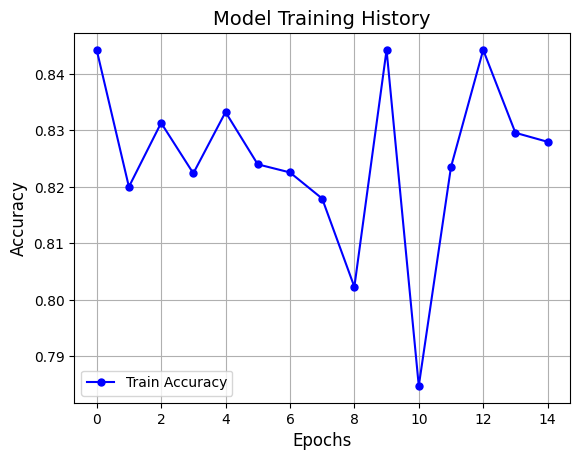

In [37]:
# Plot training history
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='blue', markersize=5, label='Train Accuracy')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Training History', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


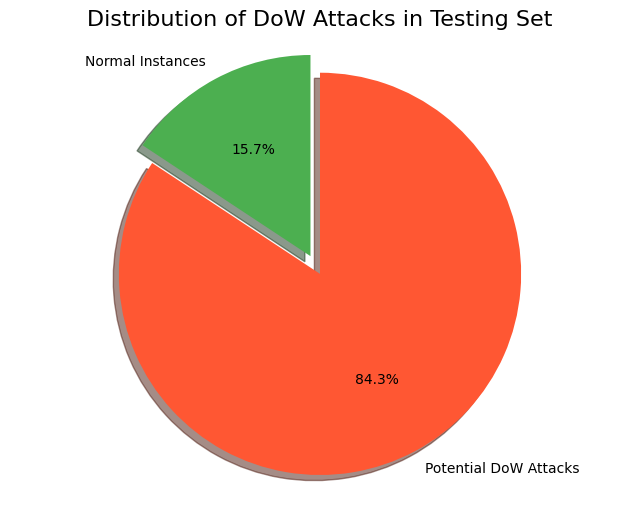

In [38]:
import matplotlib.pyplot as plt

# Calculate the percentage of DoW attacks based on the testing set
total_instances_test = len(y_test)
dos_percentage_test = np.sum(y_test) / total_instances_test * 100
normal_percentage_test = 100 - dos_percentage_test

# Pie chart for the distribution of DoW attacks in the testing set
labels = ['Normal Instances', 'Potential DoW Attacks']
sizes = [normal_percentage_test, dos_percentage_test]
colors = ['#4CAF50', '#FF5733']  # Using a visually appealing color scheme
explode = (0, 0.1)  # Explode the 2nd slice (i.e., 'Potential DoS Attacks')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of DoW Attacks in Testing Set', fontsize=16)
plt.axis('equal')
plt.show()


In [39]:
# Predicting probabilities for test set
y_pred_probs = model.predict([function_metric_test, hardware_metric_test])

# Predict binary labels based on probability threshold
y_pred = (y_pred_probs > 0.5).astype(int)

106/106 [==============================] - 0s 2ms/step


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve, auc
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.8426063671526332
Precision: 0.8428571428571429


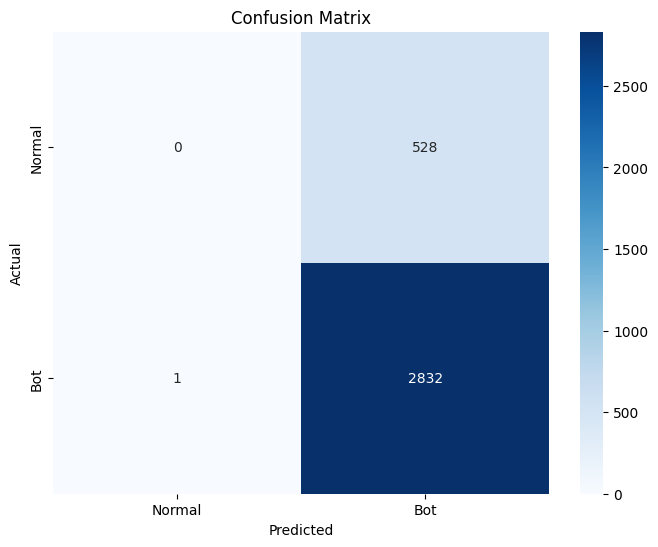

In [48]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Normal', 'Bot'])
plt.yticks([0.5, 1.5], ['Normal', 'Bot'])
plt.show()



**ROC CURVE TO BE ADDED**

In [52]:
import time

# Make predictions on the testing set and measure time
start_time = time.time()
y_pred = model.predict([function_metric_test, hardware_metric_test])
end_time = time.time()

# Calculate overhead and delay
overhead = end_time - start_time
overhead_percentage = (overhead / start_time) * 100
delay = overhead / len([function_metric_test, hardware_metric_test])

# Print overhead and delay
print("Overhead (Time taken by the model to make predictions): {:.5f} seconds".format(overhead))
print("Overhead Percentage: {}%".format(overhead_percentage))
print("Delay (Average time taken per data point for prediction):{:.5f} seconds".format(delay))

106/106 [==============================] - 0s 2ms/step
Overhead (Time taken by the model to make predictions): 0.74992 seconds
Overhead Percentage: 4.382629918609454e-08%
Delay (Average time taken per data point for prediction):0.37496 seconds
